In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imgfire/fOREST-fire/images (2).jpg
/kaggle/input/imgfire/fOREST-fire/2019-09-13-00_00_2019-09-13-23_59_Sentinel-2_L2A_Wildfires.jpg
/kaggle/input/imgfire/fOREST-fire/images (1).jpg
/kaggle/input/imgfire/fOREST-fire/images.jpg
/kaggle/input/ffirev5new/README.dataset.txt
/kaggle/input/ffirev5new/README.roboflow.txt
/kaggle/input/ffirev5new/data.yaml
/kaggle/input/ffirev5new/valid/labels/cl6ovzpl700cqao559u37co16_2_FALSE_COLOR_jpg.rf.0d0a46b9b33fd1502829ecfd54af50ec.txt
/kaggle/input/ffirev5new/valid/labels/cl6ov6vs700brao5593c06pe7_6_SWIR_jpg.rf.c9ffa9f73aaf491cf634448667f0d0d4.txt
/kaggle/input/ffirev5new/valid/labels/cl6ov2mbq00bkao55f51zgp24_6_SWIR_jpg.rf.6dc209f2f45fac378ffdc8ae708a46f1.txt
/kaggle/input/ffirev5new/valid/labels/cl6ov7ksd00bsao55328v4p0c_2_FALSE_COLOR_jpg.rf.29fd543c21bfd73c291a5311bd317f2d.txt
/kaggle/input/ffirev5new/valid/labels/cl6ovgpis00c3ao558rq7d0e7_4_FALSE_COLOR__URBAN_jpg.rf.9c2264476ec7dcb848d964072e24369a.txt
/kaggle/input/ffirev5new/valid/la

In [2]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [3]:
import yaml

# Load original data.yaml
yaml_path = "/kaggle/input/ffirev5new/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Fix the paths (use absolute paths for Kaggle)
data['train'] = '/kaggle/input/ffirev5new/train'
data['val'] = '/kaggle/input/ffirev5new/valid'
# Optional: test path if you want to evaluate
data['test'] = '/kaggle/input/ffirev5new/test'

# Save the new YAML file to working directory
new_yaml_path = '/kaggle/working/data.yaml'

with open(new_yaml_path, 'w') as f:
    yaml.dump(data, f)

print("Updated data.yaml saved at:", new_yaml_path)


Updated data.yaml saved at: /kaggle/working/data.yaml


In [4]:
import yaml

yaml_path = "/kaggle/working/data.yaml"

# Open and load the YAML file
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Print contents
print("YAML contents:")
print(data)

YAML contents:
{'names': ['fire'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'wildfire-yh86l', 'url': 'https://universe.roboflow.com/mini-z0ruz/wildfire-yh86l/dataset/2', 'version': 2, 'workspace': 'mini-z0ruz'}, 'test': '/kaggle/input/ffirev5new/test', 'train': '/kaggle/input/ffirev5new/train', 'val': '/kaggle/input/ffirev5new/valid'}


In [5]:
!yolo task=detect mode=train data=/kaggle/working/data.yaml model="yolov5su.pt" epochs=100 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|███████████████████████████████████████| 17.7M/17.7M [00:00<00:00, 133MB/s]
Ultralytics 8.3.145 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01

In [6]:
from ultralytics import YOLO
from IPython.display import Image


image 1/1 /kaggle/input/imgfire/fOREST-fire/2019-09-13-00_00_2019-09-13-23_59_Sentinel-2_L2A_Wildfires.jpg: 288x640 7 fires, 43.9ms
Speed: 2.0ms preprocess, 43.9ms inference, 203.6ms postprocess per image at shape (1, 3, 288, 640)


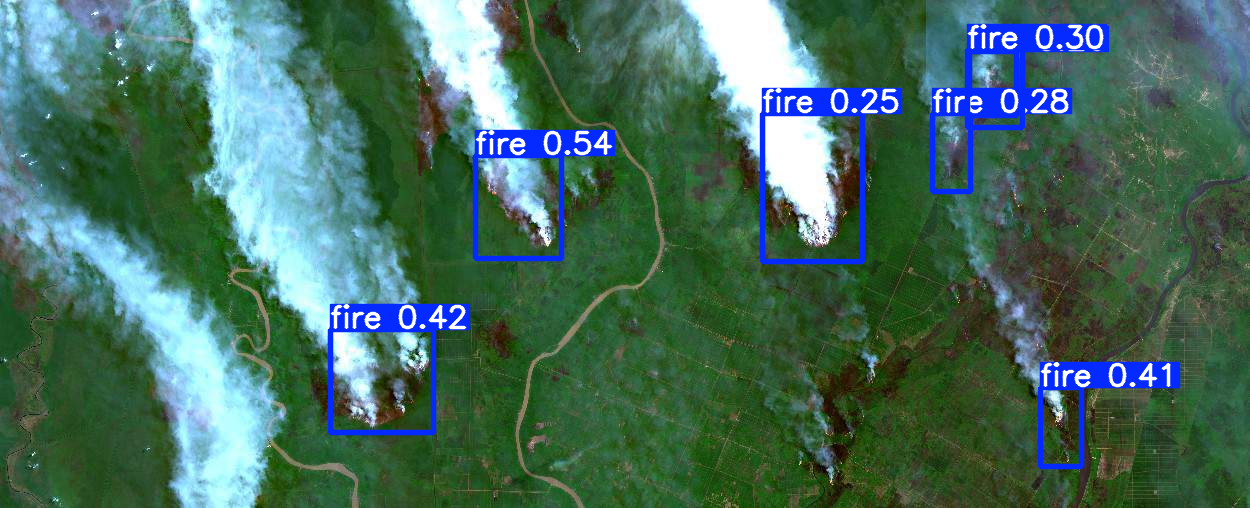


image 1/1 /kaggle/input/imgfire/fOREST-fire/images (2).jpg: 384x640 1 fire, 50.3ms
Speed: 2.4ms preprocess, 50.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


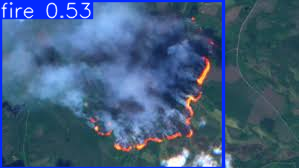


image 1/1 /kaggle/input/imgfire/fOREST-fire/images (1).jpg: 448x640 1 fire, 41.1ms
Speed: 1.7ms preprocess, 41.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


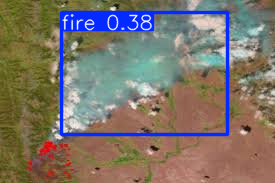


image 1/1 /kaggle/input/imgfire/fOREST-fire/images.jpg: 448x640 1 fire, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


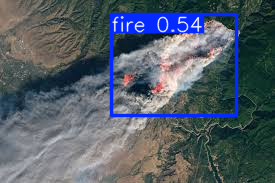

In [8]:
from ultralytics import YOLO

# Load the trained model
# IT IS STORED IN THE FOLLOWING VALIDATION FOLDER NAMED Validating runs/detect/train/weights/best.pt.
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

results = model("/kaggle/input/imgfire/fOREST-fire/2019-09-13-00_00_2019-09-13-23_59_Sentinel-2_L2A_Wildfires.jpg")

results[0].show()

results = model("/kaggle/input/imgfire/fOREST-fire/images (2).jpg")

results[0].show()

results = model("/kaggle/input/imgfire/fOREST-fire/images (1).jpg")

results[0].show()

results = model("/kaggle/input/imgfire/fOREST-fire/images.jpg")

results[0].show()

In [9]:
import pandas as pd

# Load the results CSV
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')

# Display the first few rows
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,55.0219,1.88600,2.59306,1.90209,0.12723,0.29225,0.10598,0.03537,2.58203,4.03272,3.03681,0.000663,0.000663,0.000663
1,2,107.7610,1.97021,2.45484,1.94153,0.24777,0.24296,0.15541,0.05471,2.22973,3.57501,2.62289,0.001317,0.001317,0.001317
2,3,162.0260,1.93058,2.39866,1.90672,0.16653,0.22183,0.11749,0.04189,2.37462,4.67973,2.60122,0.001957,0.001957,0.001957
3,4,215.7010,1.90496,2.33323,1.87336,0.24708,0.30986,0.18022,0.06411,2.23626,3.37565,2.47478,0.001941,0.001941,0.001941
4,5,269.4000,1.83600,2.26190,1.81128,0.35061,0.26056,0.22790,0.09369,2.03324,2.56826,2.35988,0.001921,0.001921,0.001921


F1 Curve:


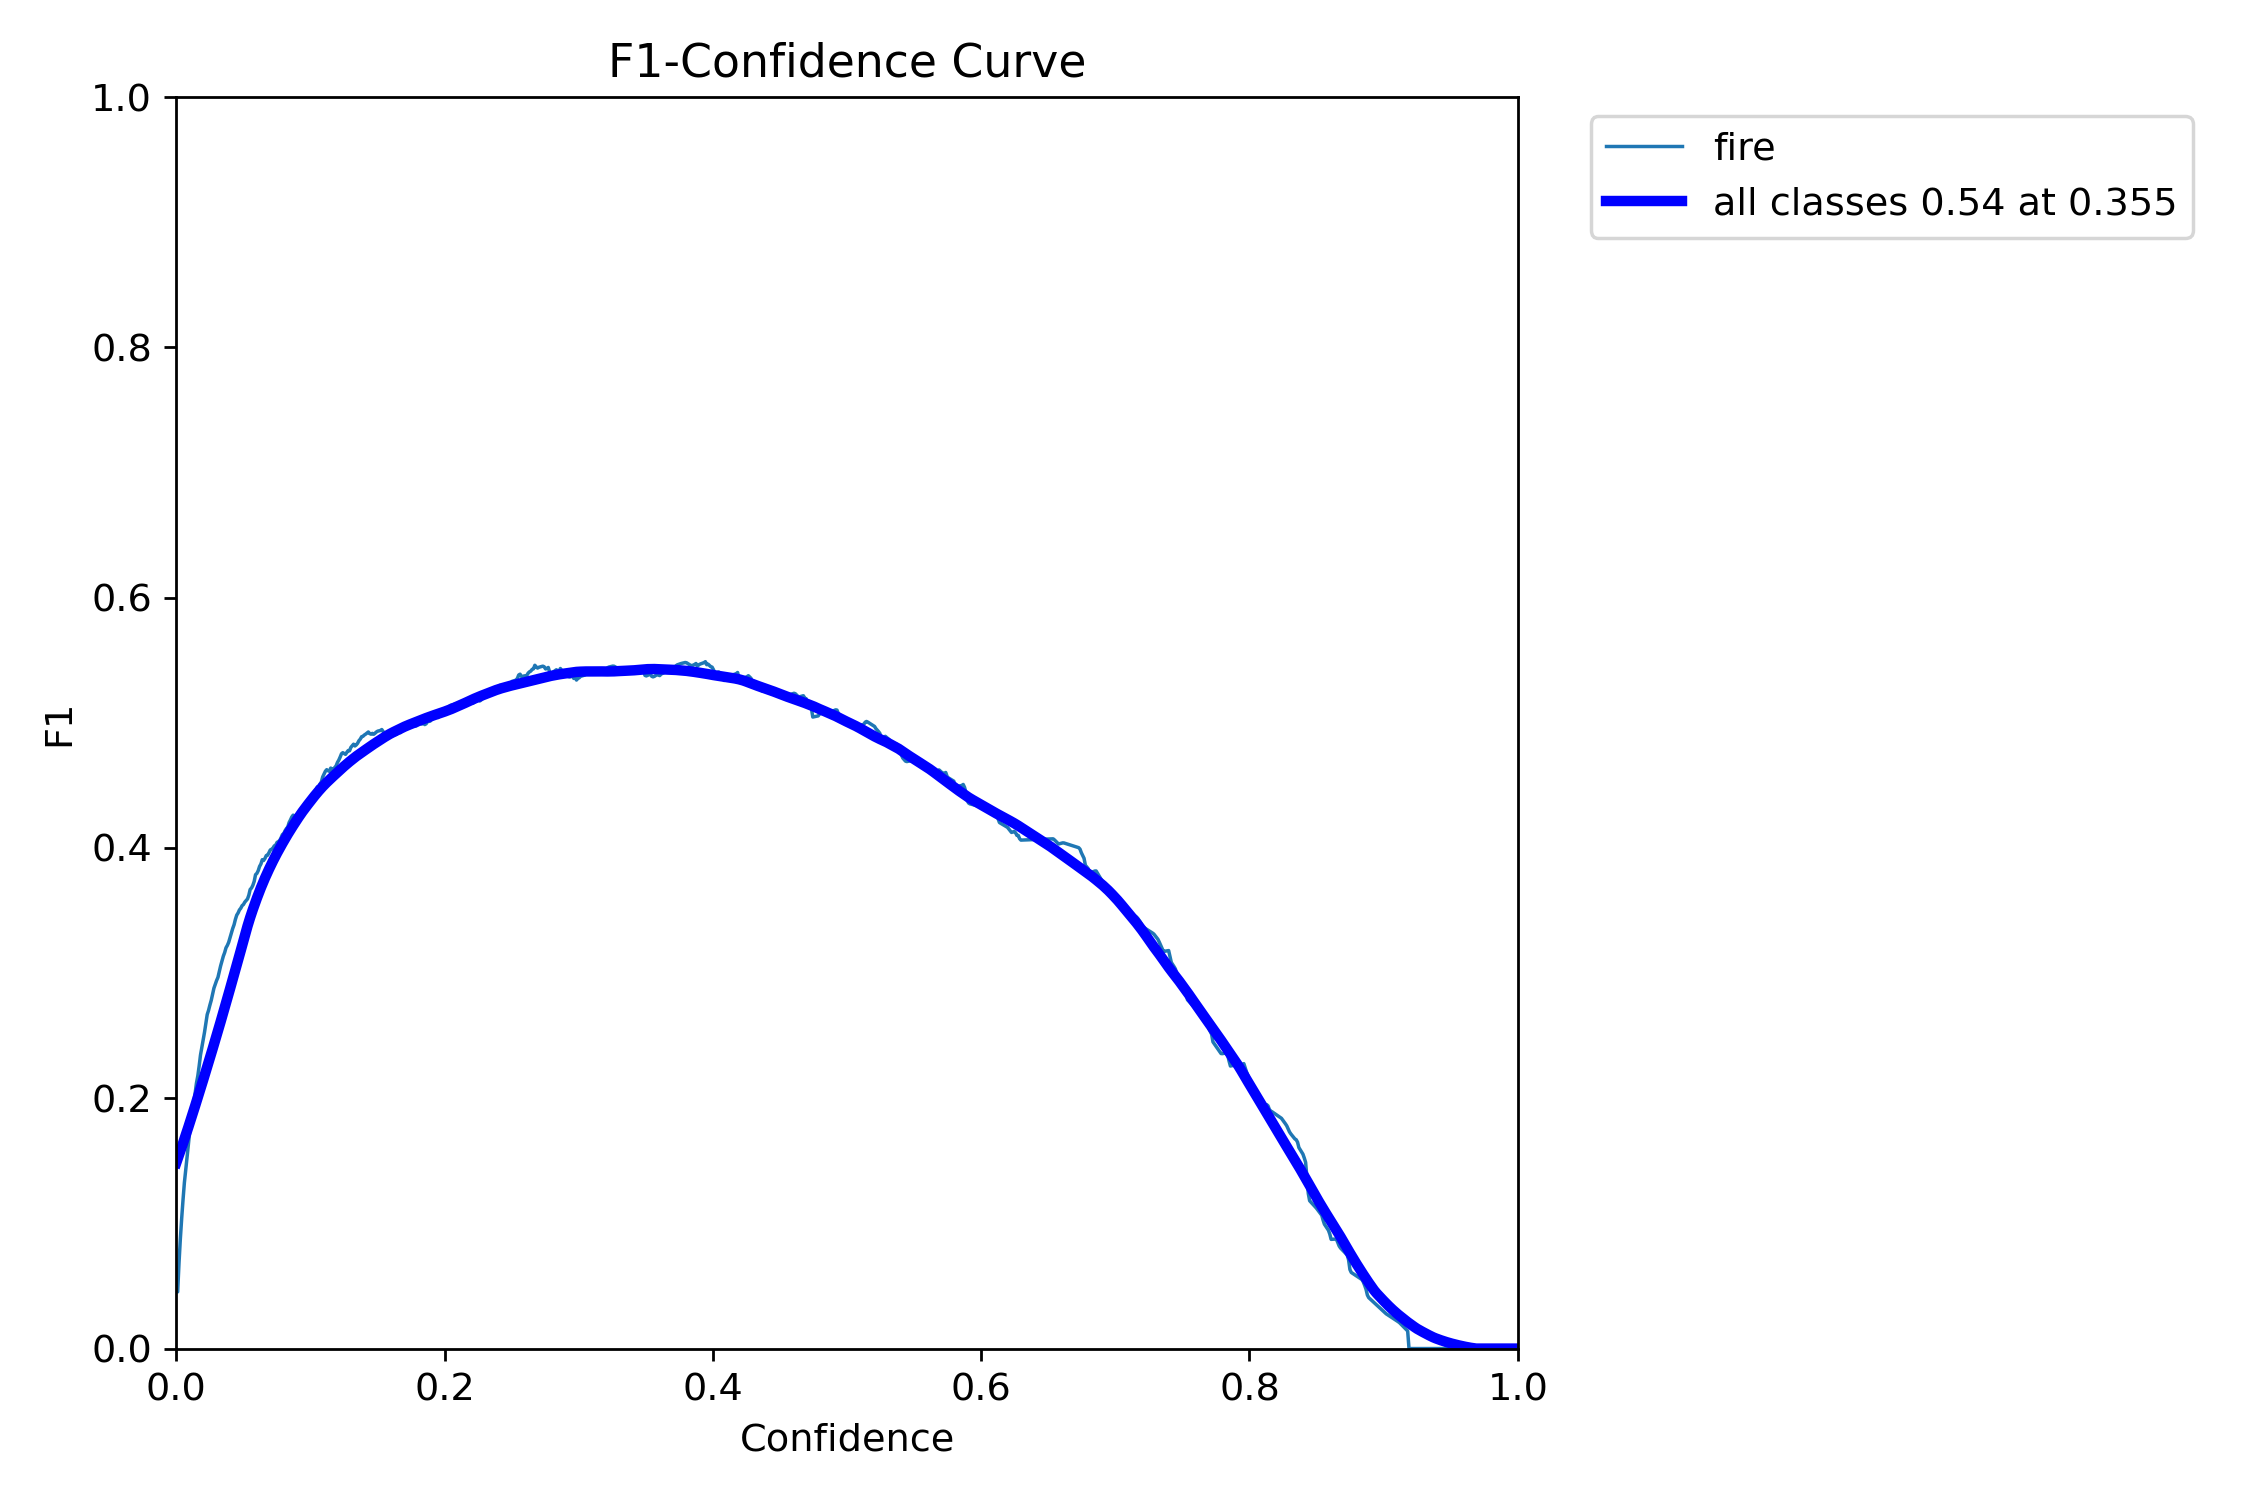

In [10]:
# Display F1 Curve
print("F1 Curve:")
display(Image(filename='/kaggle/working/runs/detect/train/F1_curve.png'))

Precision-Recall Curve:


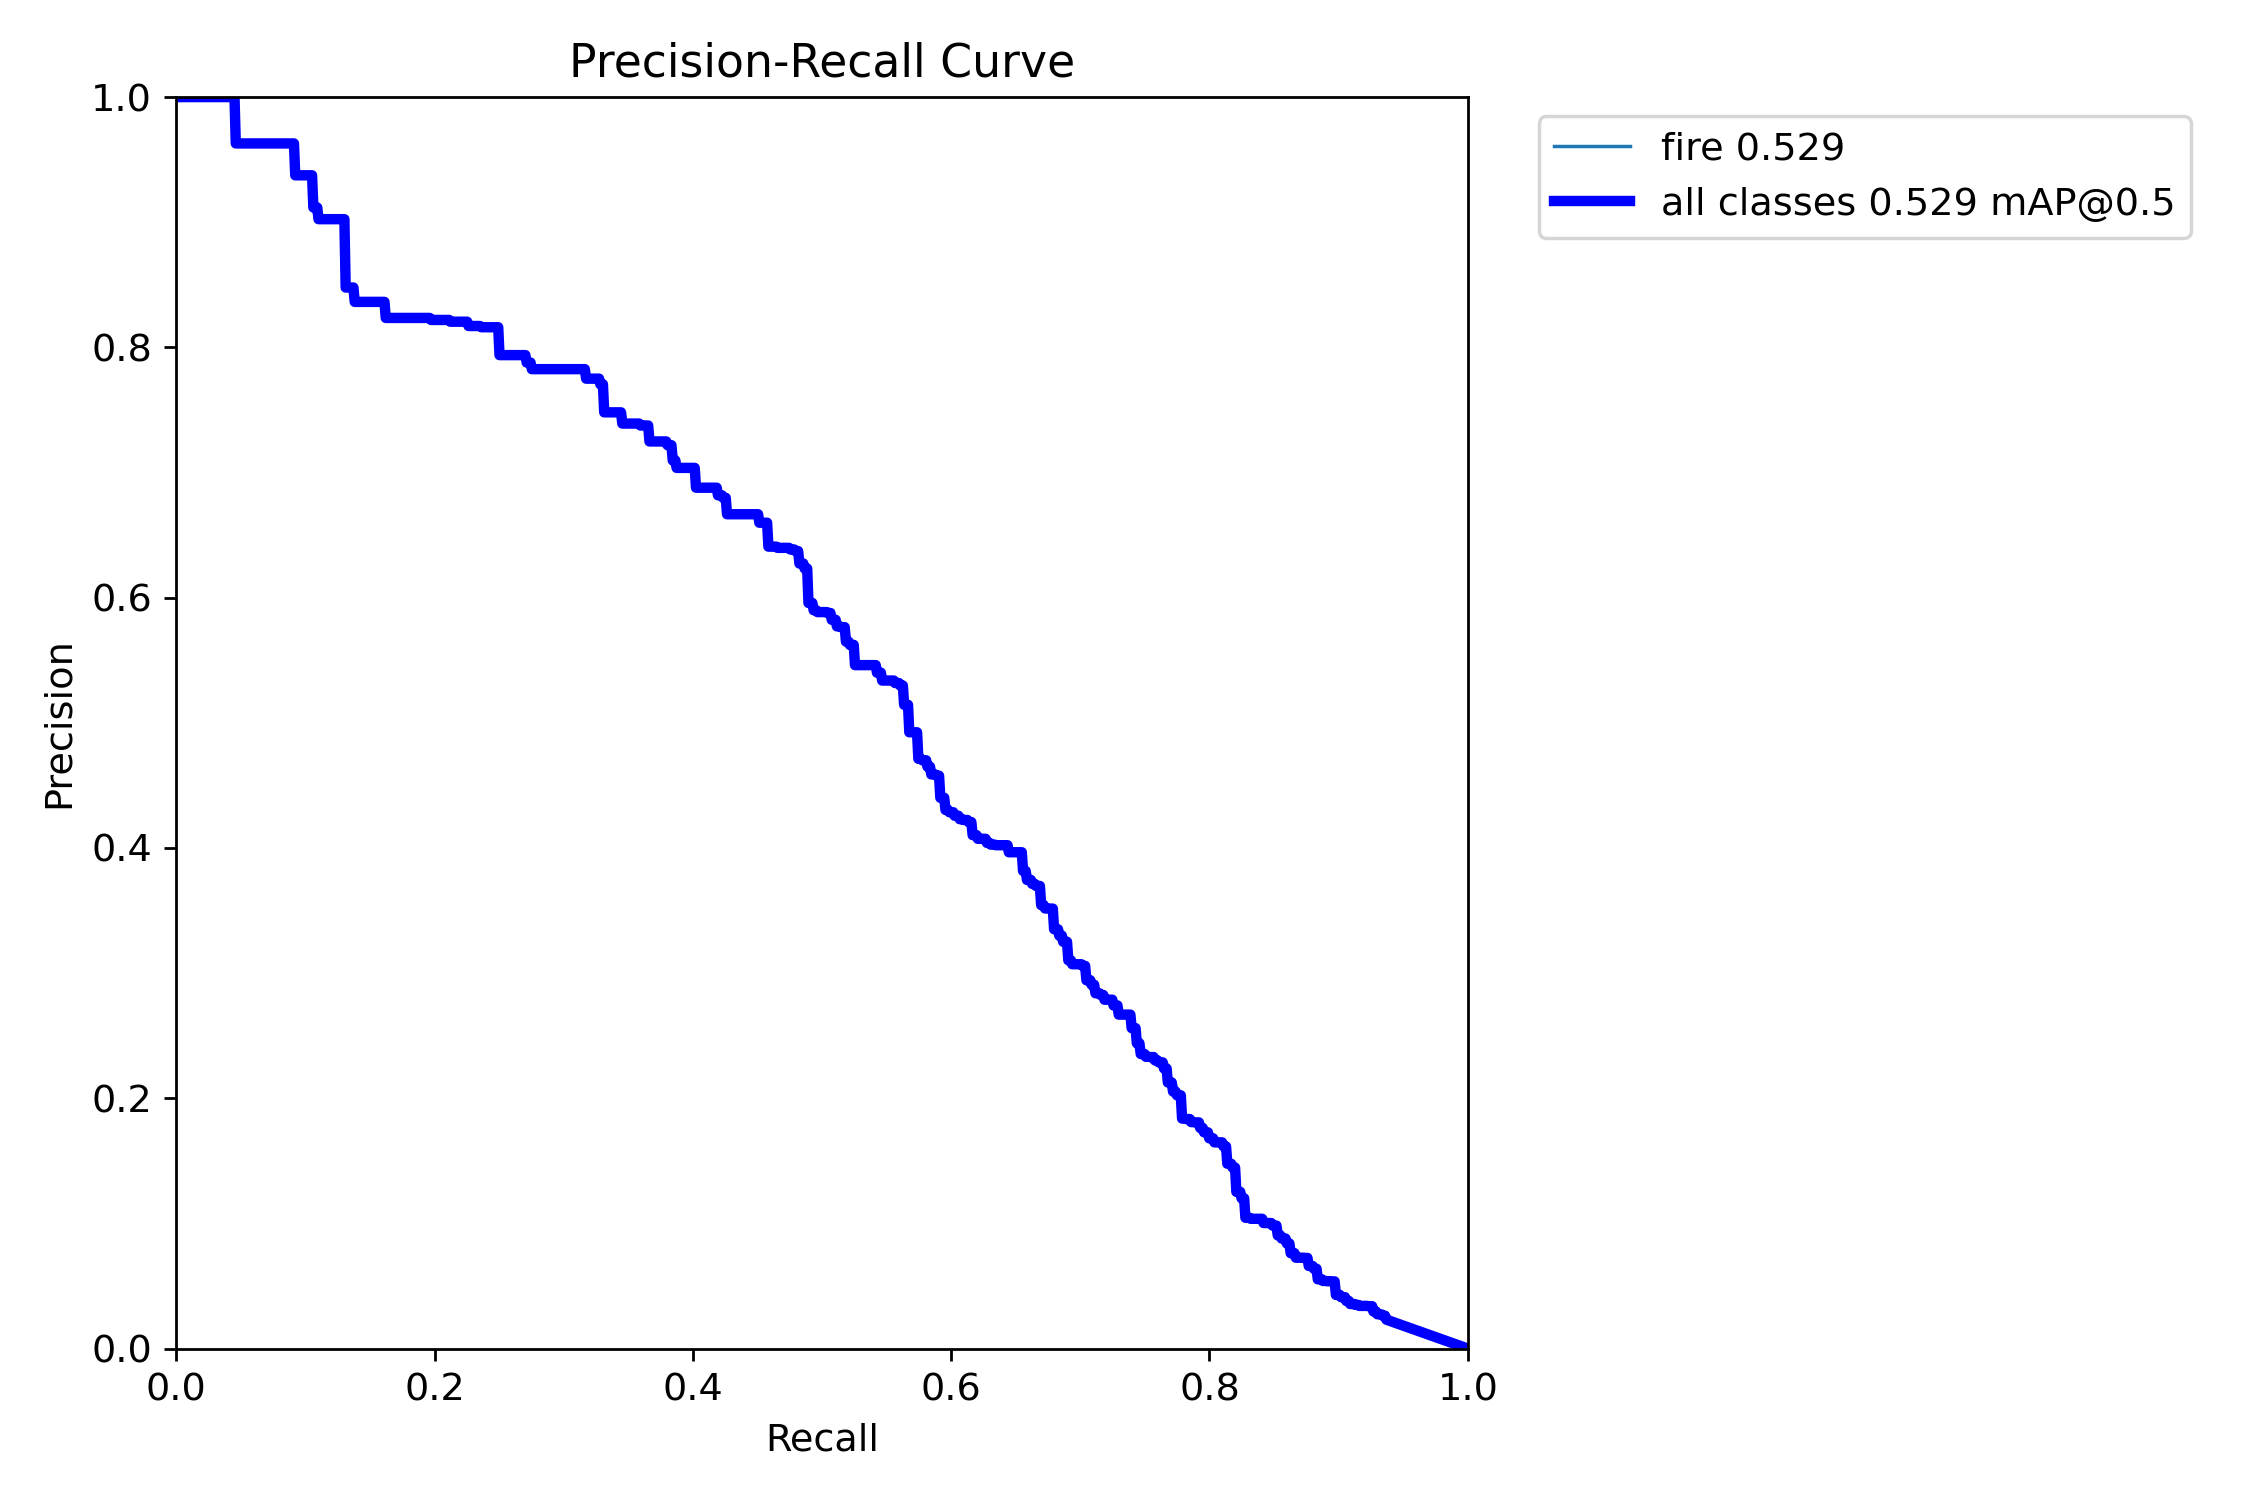

In [11]:
# Display PR Curve
print("Precision-Recall Curve:")
display(Image(filename='/kaggle/working/runs/detect/train/PR_curve.png'))

Confusion Matrix:


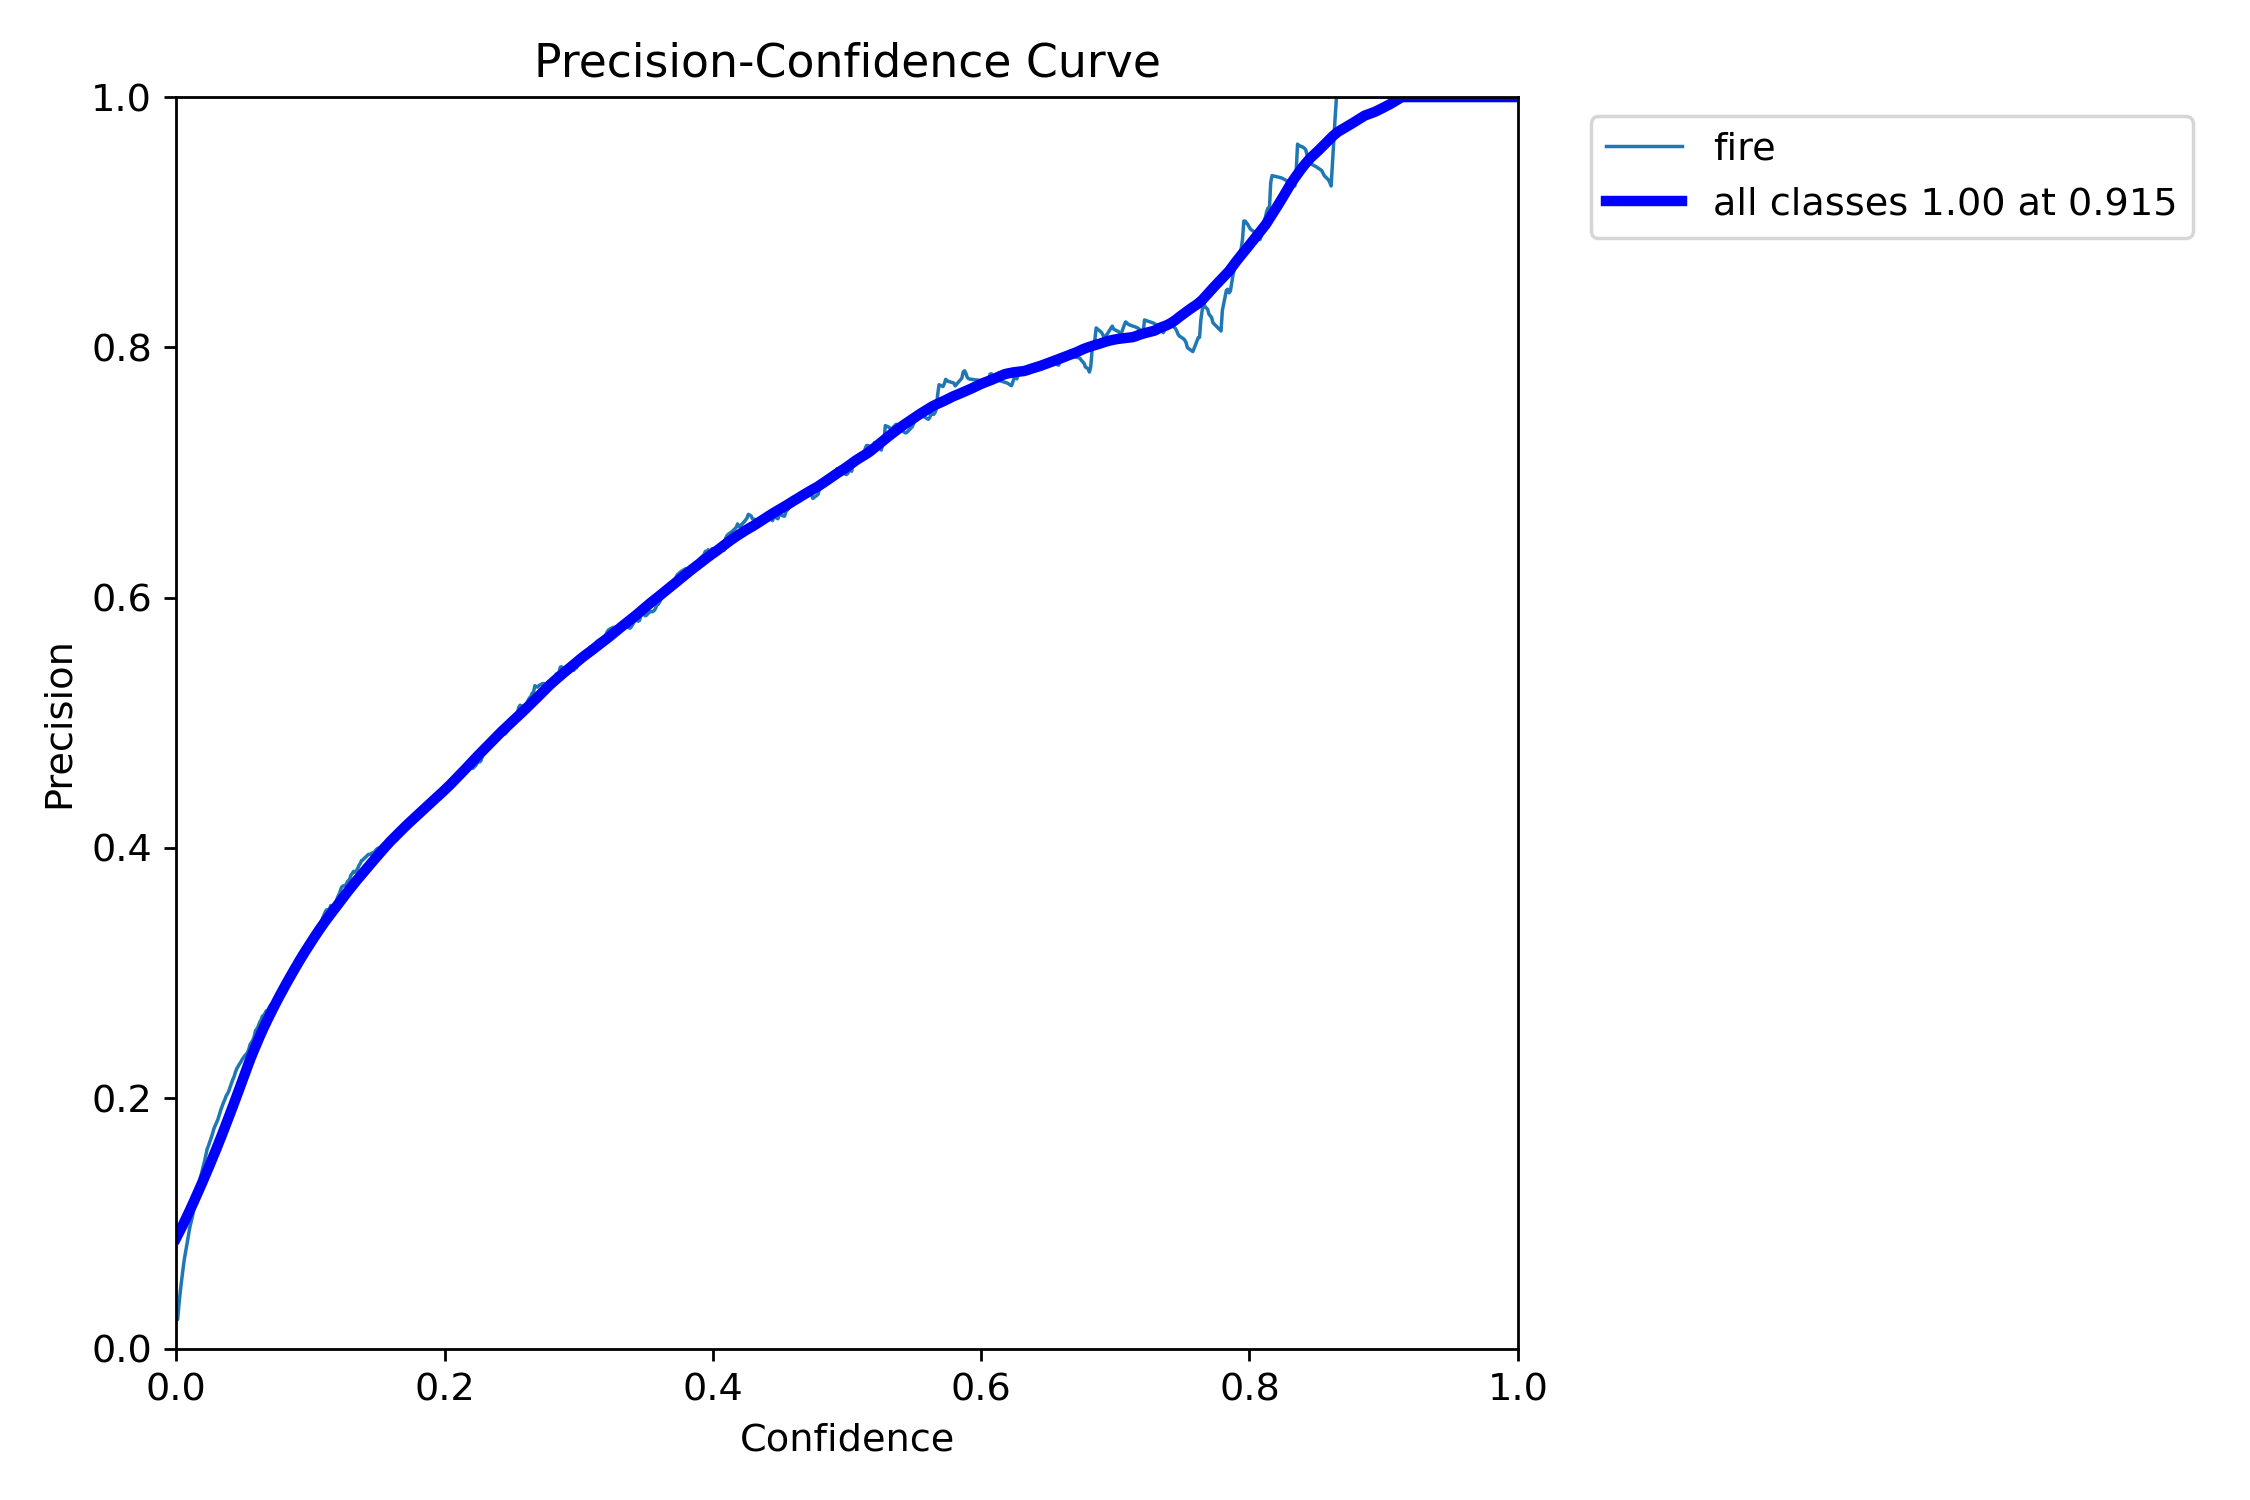

In [12]:
# Display Confusion Matrix
print("Confusion Matrix:")
display(Image(filename='/kaggle/working/runs/detect/train/P_curve.png'))

Training Results:


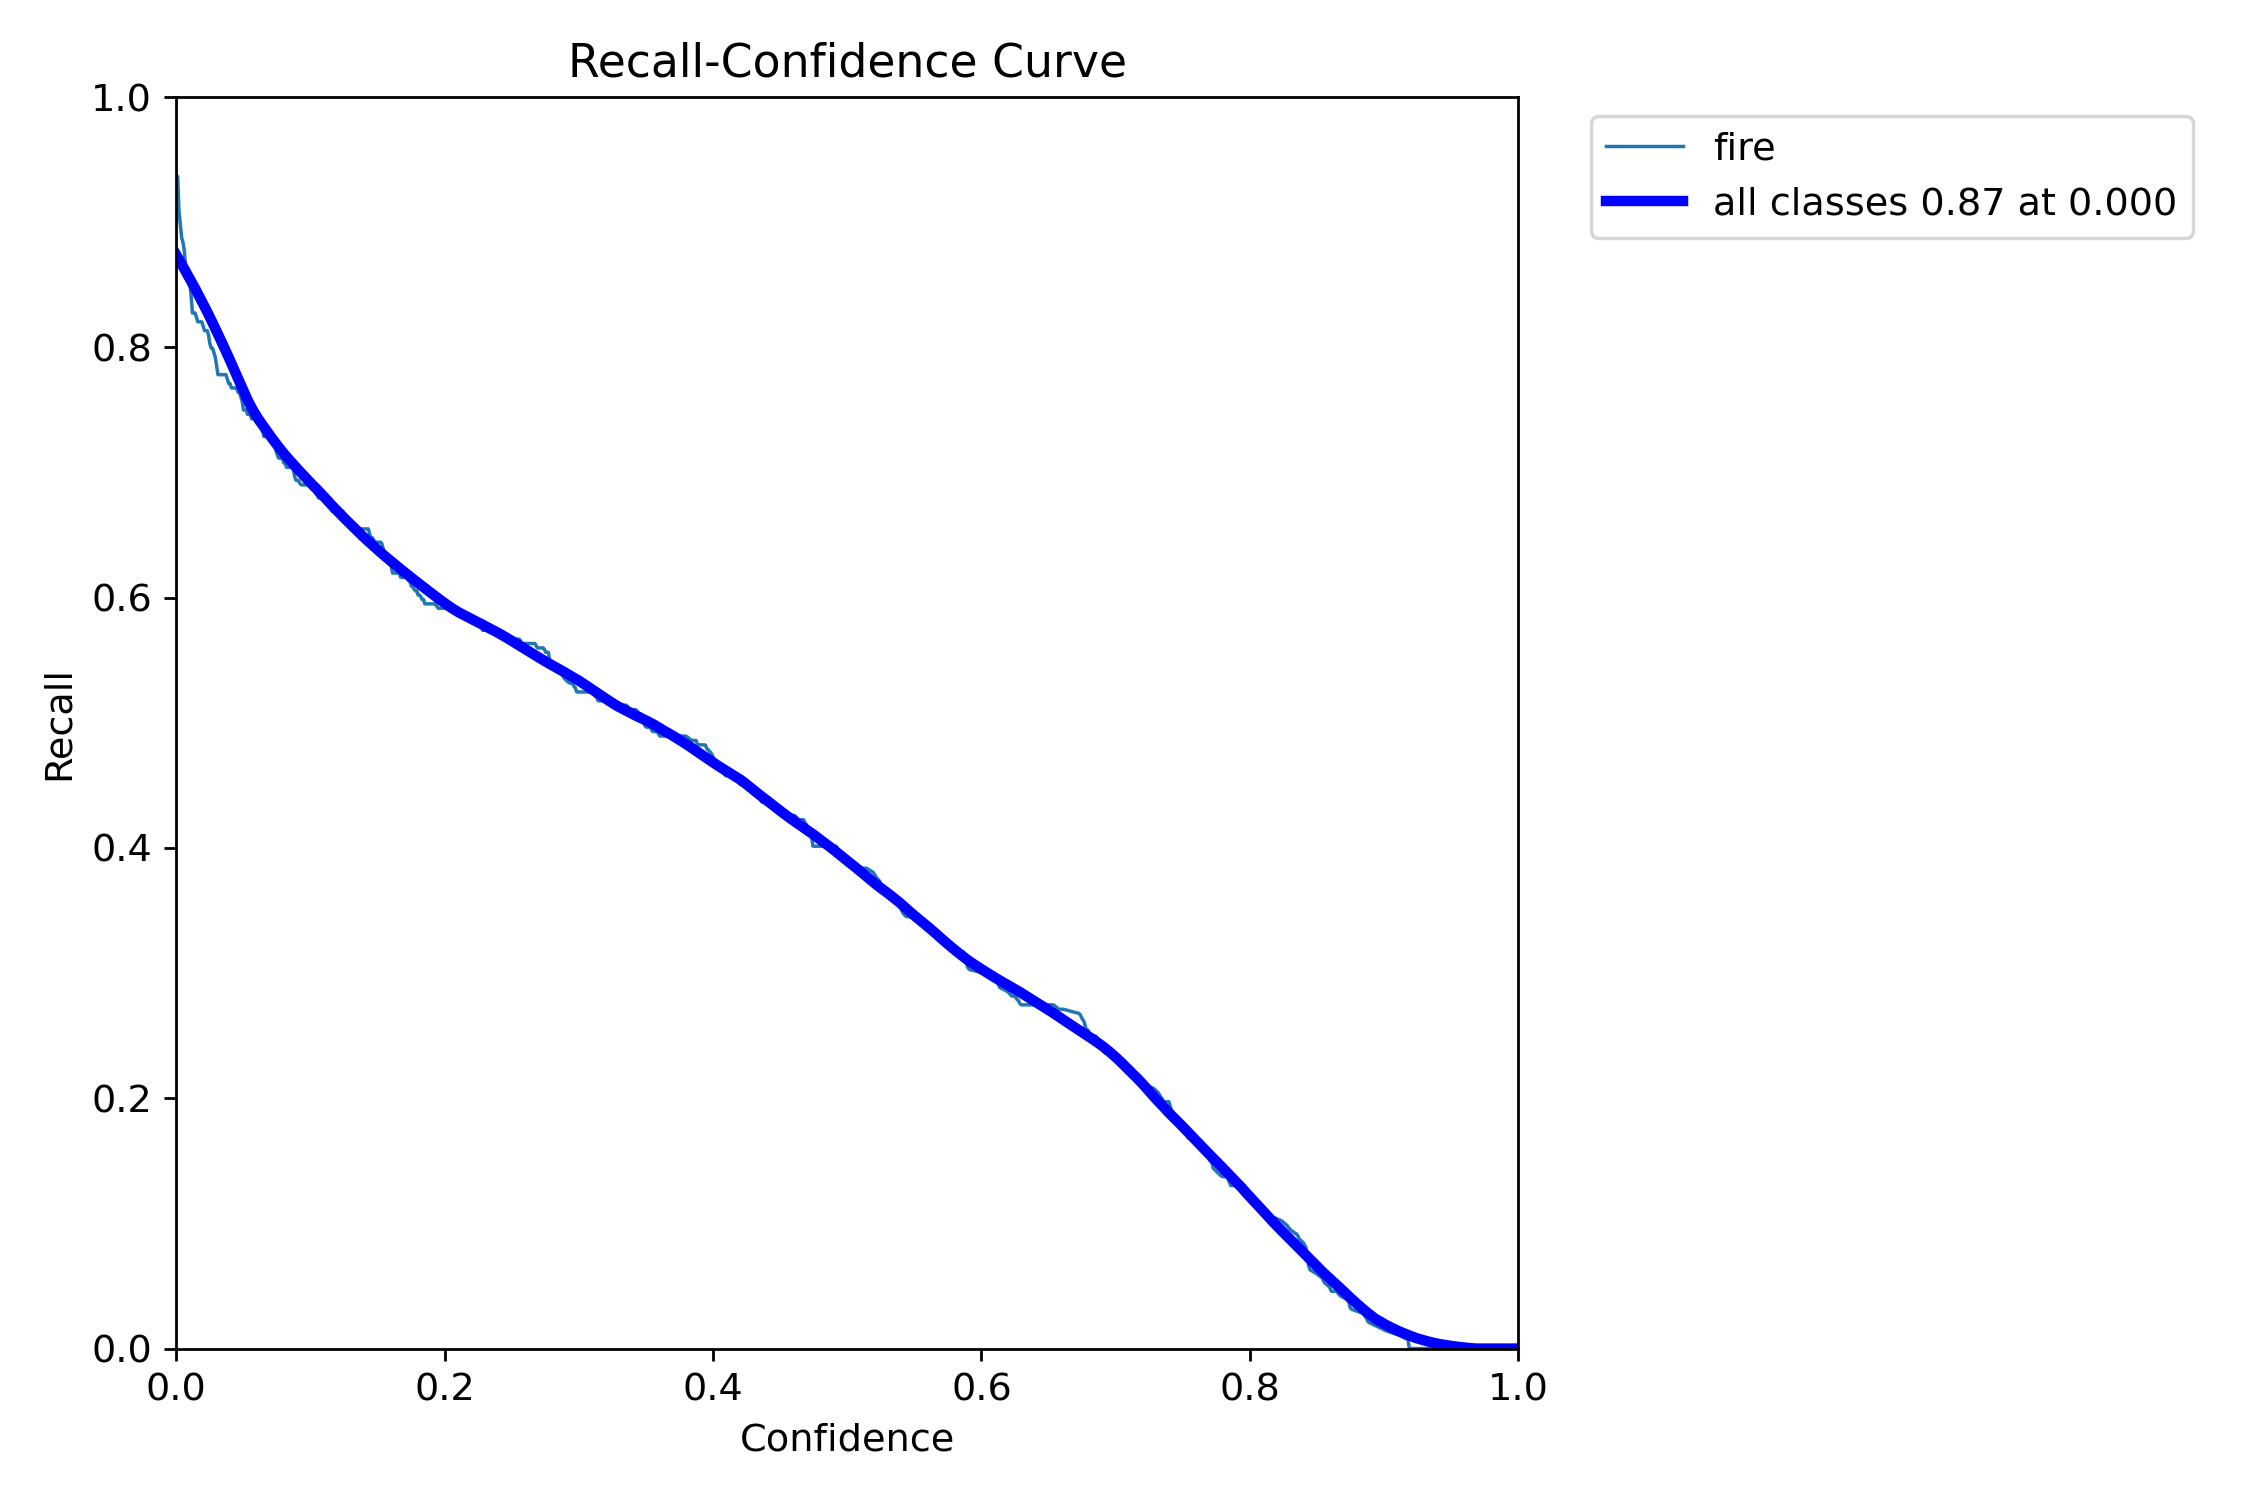

In [13]:
# Display Results (Metrics Over Epochs)
print("Training Results:")
display(Image(filename='/kaggle/working/runs/detect/train/R_curve.png'))

In [14]:
import time
import torch

# Example: Load YOLOv5s model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# Replace with your test image path
img = '/kaggle/input/imgfire/fOREST-fire/images (1).jpg'

# Measure inference time
start = time.time()
results = model(img)
end = time.time()

print(f"Latency: {(end - start)*1000:.2f} ms") 


image 1/1 /kaggle/input/imgfire/fOREST-fire/images (1).jpg: 448x640 1 fire, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Latency: 200.45 ms
